In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras import layers
from keras.models import Sequential

In [2]:


dataset_train = pd.read_csv('trainset.csv')

In [3]:


dataset_train.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [4]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [5]:
train_set = dataset_train.iloc[:,1:2].values

In [6]:
type(train_set)

numpy.ndarray

In [7]:
train_set.shape

(1259, 1)

In [8]:

sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(train_set)

In [9]:
training_set_scaled.shape

(1259, 1)

In [10]:
X_train_array = []
y_train_array = []
for i in range(60, 1259):
  X_train_array.append(training_set_scaled[i-60:i,0])
  y_train_array.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train_array), np.array(y_train_array)
X_train1 = X_train.reshape((X_train.shape[0], X_train.shape[1],1))

In [11]:

X_train.shape


(1199, 60)

In [12]:
length = 60
n_features = 1

In [50]:
stock = Sequential()
s1=layers.SimpleRNN(45,input_shape=(length, n_features))
stock.add(s1)
s3=layers.Dense(30,activation='relu')
stock.add(s3)
s4=layers.Dense(1)
stock.add(s4)

In [53]:

stock.compile(optimizer='adam', loss='mse')



In [54]:

print("Name:Easwari M   Register Number: 212223240033        ")
stock.summary()



Name:Easwari M   Register Number: 212223240033        
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 45)                2115      
                                                                 
 dense_6 (Dense)             (None, 30)                1380      
                                                                 
 dense_7 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3526 (13.77 KB)
Trainable params: 3526 (13.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
stock.fit(X_train1,y_train,epochs=10, batch_size=32)


Epoch 1/10
38/38 [==============================] - 1s 9ms/step - loss: 0.0437
Epoch 2/10
38/38 [==============================] - 0s 9ms/step - loss: 9.7958e-04
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 6.5703e-04
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 5.9990e-04
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 6.0156e-04
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 5.5387e-04
Epoch 7/10
38/38 [==============================] - 0s 10ms/step - loss: 5.4897e-04
Epoch 8/10
38/38 [==============================] - 0s 9ms/step - loss: 5.4561e-04
Epoch 9/10
38/38 [==============================] - 0s 9ms/step - loss: 4.8553e-04
Epoch 10/10
38/38 [==============================] - 0s 9ms/step - loss: 4.8118e-04


In [56]:


dataset_test = pd.read_csv('testset.csv')


In [57]:


test_set = dataset_test.iloc[:,1:2].values

In [58]:

test_set.shape

(125, 1)

In [59]:


dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)

In [60]:

inputs = dataset_total.values
inputs = inputs.reshape(-1,1)
inputs_scaled=sc.transform(inputs)
X_test = []
for i in range(60,1384):
  X_test.append(inputs_scaled[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

In [61]:


X_test.shape

(1324, 60, 1)

In [62]:
predicted_stock_price_scaled = stock.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price_scaled)


42/42 [==============================] - 0s 4ms/step


Name: Easwari M     Register Number: 212223240033 


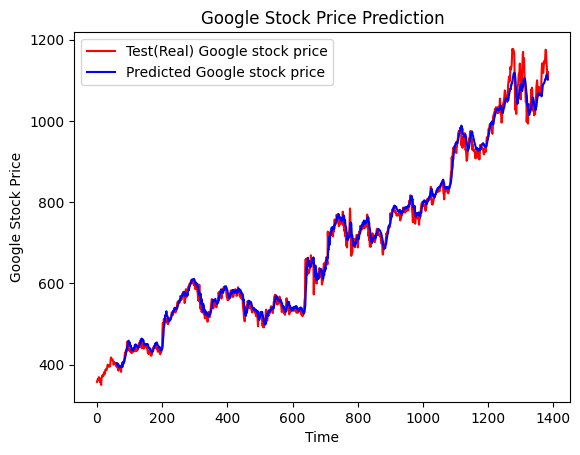

In [63]:

print("Name: Easwari M     Register Number: 212223240033 ")
plt.plot(np.arange(0,1384),inputs, color='red', label = 'Test(Real) Google stock price')
plt.plot(np.arange(60,1384),predicted_stock_price, color='blue', label = 'Predicted Google stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()